<a href="https://colab.research.google.com/github/OsmarVar/Unidad-1-Simulacion/blob/main/Integraci%C3%B3n_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para la integral,

$$ \int_{0}^{1} \sqrt{arctan(x)dx} $$



Comenzando por el método de la media muestral, siguiendo los siguientes paso:

1.-Generar puntos aleatorios $x_{i}$
2.-Evaluar la función en los puntos $x_{i}$
3.-Calcular la media de los valores de la función
4.-Estimar la integral

Supongamos que, $N = 10$

Generamos los números aleatorios x_{i}:
$$ x_{1},x_{2},...,x_{10}$$

Tomemos como ejemplo los números: 0.1,0.25,0.4,0.55,0.7,0.85,0.15,0.3,0.45,0.6

Procedemos a evaluar la función en los puntos tomados como ejemplos:

$$f(0,1) = \sqrt{arctan(0.1)},f(0.25) = \sqrt{arctan(0.25)},...,f(0.6) = \sqrt{arctan(0.6)}$$

Ahora, calculamos de los valores de la función:

$$ Media = \frac{1}{10} \sum_{i=1}^{10} \sqrt{arctan(x_{i})}$$

Donde la suma de valores se vería de la siguiente manera:

$$Media = \frac{1}{10} (\sqrt{arctan(0.1)} + \sqrt{arctan(0.25)} + ... \sqrt{arctan(0.6)}$$

En donde la media muestral calculada en el paso anterior seria nuestra estimación de la integral.


En un enfoque mas a la simulación, podemos usar el siguiente código, el cual tomaremos $N = 1,000,000$ para obtener una estimación más precisa.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
#Definimos la función a integrar
def integral(x):
  return np.sqrt(np.arctan(x))

In [5]:
#Colocamos los parametros de la simulación
N=1000000 #Siendo N el número de puntos para la simulación

In [6]:
#Aplicamos el metodo de la media muestral, el cual se veria de la siguiente manera
x_values = np.random.uniform(0, 1, N) #Generamos puntos aleatorios
f_values = integral(x_values)    #Evaluamos la función en los puntos
sample_mean =  np.mean(f_values)  #Calculamos la media muestral

sample_mean

0.6296655653878279

Ahora si queremos ver como sería interpretado la integral realizada, podemos verlo en el siguiente código

In [7]:
#Definimos el intervalo y calculamos los valores de la función para la gráfica
x_plot = np.linspace(0, 1, 500)
y_plot = integral(x_plot)

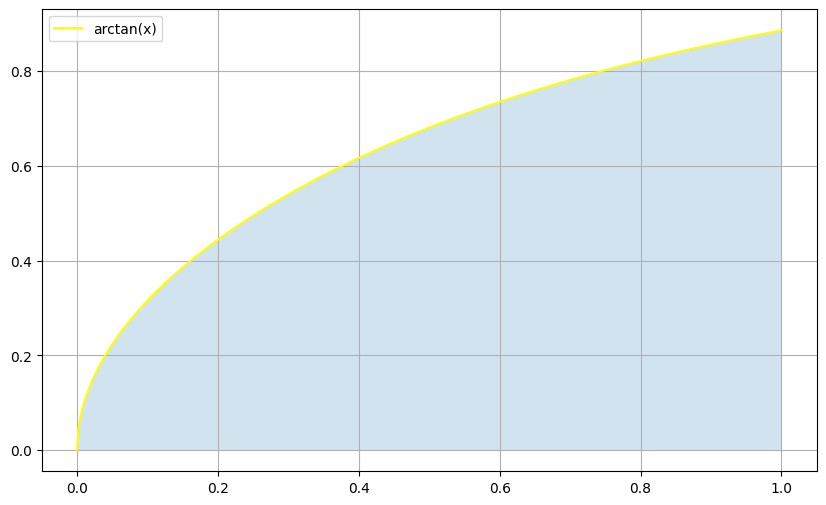

In [9]:
#Creamos la gráfica
plt.figure(figsize=(10,6))
plt.plot(x_plot, y_plot, label='arctan(x)',color='yellow')
plt.fill_between(x_plot, y_plot, alpha=0.2)
plt.legend()
plt.grid(True)
plt.show()

Ahora para el metodo de monte carlo,sería lo siguiente:

In [10]:
#Definimos la funcion a integrar
def integral(x):
  return np.sqrt(np.arctan(x))

In [11]:
#Parametros de la simulación
N = 1000000 #Número de puntos de cada simulación
num_simulations = 100 #Número de simulaciones

In [12]:
#Definimos el valor máximo de la función del intervalo [0,1]
y_max = np.sqrt(np.arctan(1))

In [13]:
#Almecenamos las estimaciones de cada simulación
estimates = []

In [14]:
for _ in range(num_simulations):
  x_rand = np.random.uniform(0,1,N)
  y_rand = integral(x_rand)
  under_curve = np.sum(y_rand <= integral(x_rand))
  area_rect = y_max
  monte_carlo_estimate = area_rect * under_curve / N
  estimates.append(monte_carlo_estimate)


In [15]:
#Convertimos las estimaciones
estimates =  np.array(estimates)

In [16]:
#Calculamos la media y la desviación estandar de las estimaciones
mean_estimate = np.mean(estimates)
std_estimate = np.std(estimates)

In [17]:
#Calculamos el intervalo de confianza del 95%
confidence_level = 0.95
z_score = 1.96 #Esto para un intervalo de confianza del 95%
margin_of_error = z_score * (std_estimate / np.sqrt(num_simulations))

In [18]:
confidence_interval = (mean_estimate - margin_of_error, mean_estimate + margin_of_error)

In [20]:
#Imprimimos los resultados
print(f"Estimación de la integral: {mean_estimate}")
print(f"Intervalo de confianza del 95%: {confidence_interval}")

Estimación de la integral: 0.8862269254527582
Intervalo de confianza del 95%: (0.8862269254527582, 0.8862269254527582)


In [22]:
#graficamos la funcion y los puntos utilizados en una de las simulaciones
x_plot = np.linspace(0, 1, 500)
y_plot = integral(x_plot)

In [24]:
# Generar puntos aleatorios para la visualización
N_vis = 10000
x_rand_vis = np.random.uniform(0, 1, N_vis)
y_rand_vis = np.random.uniform(0, y_max, N_vis)
under_curve_vis = y_rand_vis < integral(x_rand_vis)

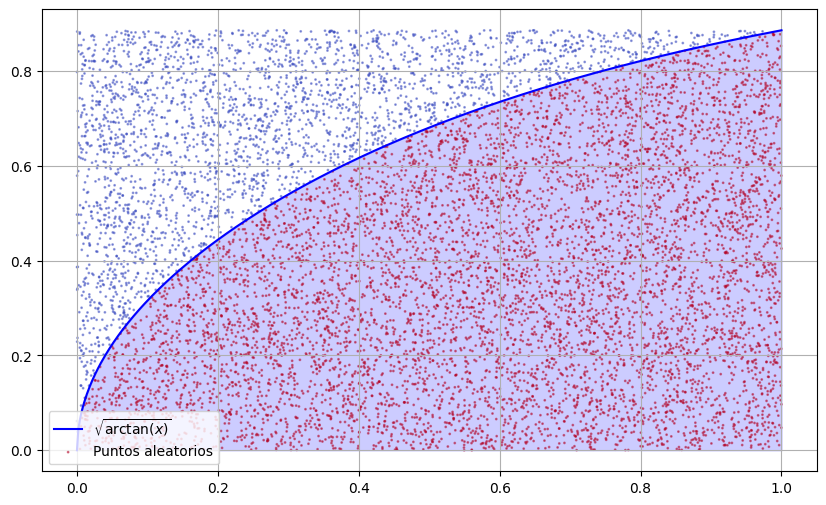

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label=r'$\sqrt{\arctan(x)}$', color='b')
plt.fill_between(x_plot, y_plot, alpha=0.2, color='b')
plt.scatter(x_rand_vis, y_rand_vis, c=under_curve_vis, cmap='coolwarm', alpha=0.5, s=1, label='Puntos aleatorios')
plt.legend()
plt.grid(True)
plt.show()